# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
sns.set_palette('muted')

from datetime import datetime

In [2]:
DATE_TODAY = datetime.today().date()
DATA_PATH = '../data/equity-post-HCT-survival-predictions/'

# EDA

In [3]:
train_df = pd.read_csv(DATA_PATH + 'train.csv')

In [4]:
numeric_cols = []
categorical_cols = []

for col, typ in train_df.dtypes.items():
    if typ == 'int64' or typ =='float64':
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

## Numeric Variables

### Correlation

In [5]:
corr_mat = abs(train_df[numeric_cols].corr())

upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
corr_cols = [col for col in upper.columns if any(upper[col] > 0.9)]

print(f'''Correlated columns:
      {corr_cols}''')

for col in corr_cols:
    numeric_cols.remove(col)

Correlated columns:
      ['hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_low_res_8', 'hla_low_res_10']


In [6]:
numeric_cols

['ID',
 'hla_match_c_high',
 'hla_high_res_8',
 'hla_match_dqb1_high',
 'hla_nmdp_6',
 'hla_match_c_low',
 'hla_match_drb1_low',
 'hla_match_dqb1_low',
 'year_hct',
 'hla_match_a_high',
 'donor_age',
 'hla_match_b_low',
 'age_at_hct',
 'hla_match_a_low',
 'hla_match_b_high',
 'comorbidity_score',
 'karnofsky_score',
 'hla_match_drb1_high',
 'efs',
 'efs_time']

In [7]:
corr_mat['efs']

ID                     0.003517
hla_match_c_high       0.031850
hla_high_res_8         0.044224
hla_low_res_6          0.047007
hla_high_res_6         0.045261
hla_high_res_10        0.048431
hla_match_dqb1_high    0.039736
hla_nmdp_6             0.040145
hla_match_c_low        0.016335
hla_match_drb1_low     0.067485
hla_match_dqb1_low     0.032440
year_hct               0.106419
hla_match_a_high       0.015881
donor_age              0.047566
hla_match_b_low        0.040965
age_at_hct             0.227866
hla_match_a_low        0.015086
hla_match_b_high       0.026293
comorbidity_score      0.145723
karnofsky_score        0.091156
hla_low_res_8          0.040612
hla_match_drb1_high    0.074446
hla_low_res_10         0.041972
efs                    1.000000
efs_time               0.741042
Name: efs, dtype: float64

### Histograms

- match_cols

In [8]:
match_cols = [
    'hla_high_res_8',
    'hla_match_a_high', 'hla_match_a_low',
    'hla_match_b_high', 'hla_match_b_low',
    'hla_match_c_high', 'hla_match_c_low',
    'hla_match_dqb1_high', 'hla_match_dqb1_low',
    'hla_match_drb1_high', 'hla_match_drb1_low',
    'hla_nmdp_6',
]

In [9]:
for col in match_cols:
    print(train_df[col].unique())

[nan  8.  7.  5.  6.  4.  3.  2.]
[ 2.  1. nan  0.]
[ 2.  1. nan  0.]
[ 2.  1. nan  0.]
[ 2.  1. nan  0.]
[nan  2.  1.  0.]
[ 2.  1. nan  0.]
[ 2.  1. nan  0.]
[ 2.  1. nan  0.]
[ 2.  1. nan  0.]
[ 2.  1. nan]
[ 6.  5.  3. nan  4.  2.]


In [10]:
# train_df['hla_match_a_combined'] = train_df['hla_match_a_high'] + train_df['hla_match_a_low']
# train_df['hla_match_b_combined'] = train_df['hla_match_b_high'] + train_df['hla_match_b_low']
# train_df['hla_match_c_combined'] = train_df['hla_match_c_high'] + train_df['hla_match_c_low']
# train_df['hla_match_dqb1_combined'] = train_df['hla_match_dqb1_high'] + train_df['hla_match_dqb1_low']
# train_df['hla_match_drb1_combined'] = train_df['hla_match_drb1_high'] + train_df['hla_match_drb1_low']

# numeric_cols.extend(['hla_match_a_combined', 'hla_match_b_combined', 'hla_match_c_combined', 'hla_match_dqb1_combined', 'hla_match_drb1_combined'])

# train_df = train_df.dropna(subset=['hla_match_a_combined', 'hla_match_b_combined', 'hla_match_c_combined', 'hla_match_dqb1_combined', 'hla_match_drb1_combined'], axis=0)

In [11]:
# train_df = pd.get_dummies(train_df, columns=['hla_match_a_high'], prefix='hla_match_a_high')
# train_df = pd.get_dummies(train_df, columns=['hla_match_b_high'], prefix='hla_match_b_high')
# train_df = pd.get_dummies(train_df, columns=['hla_match_c_high'], prefix='hla_match_c_high')
# train_df = pd.get_dummies(train_df, columns=['hla_match_dqb1_high'], prefix='hla_match_dqb1_high')
# train_df = pd.get_dummies(train_df, columns=['hla_match_drb1_high'], prefix='hla_match_drb1_high')

# for col in train_df.columns:
#     if 'hla_match_a_high' in col or 'hla_match_b_high' in col or 'hla_match_c_high' in col \
#         or 'hla_match_dqb1_high' in col or 'hla_match_drb1_high' in col:
#         numeric_cols.append(col)
        
# numeric_cols.remove('hla_match_a_high')
# numeric_cols.remove('hla_match_b_high')
# numeric_cols.remove('hla_match_c_high')
# numeric_cols.remove('hla_match_dqb1_high')
# numeric_cols.remove('hla_match_drb1_high')

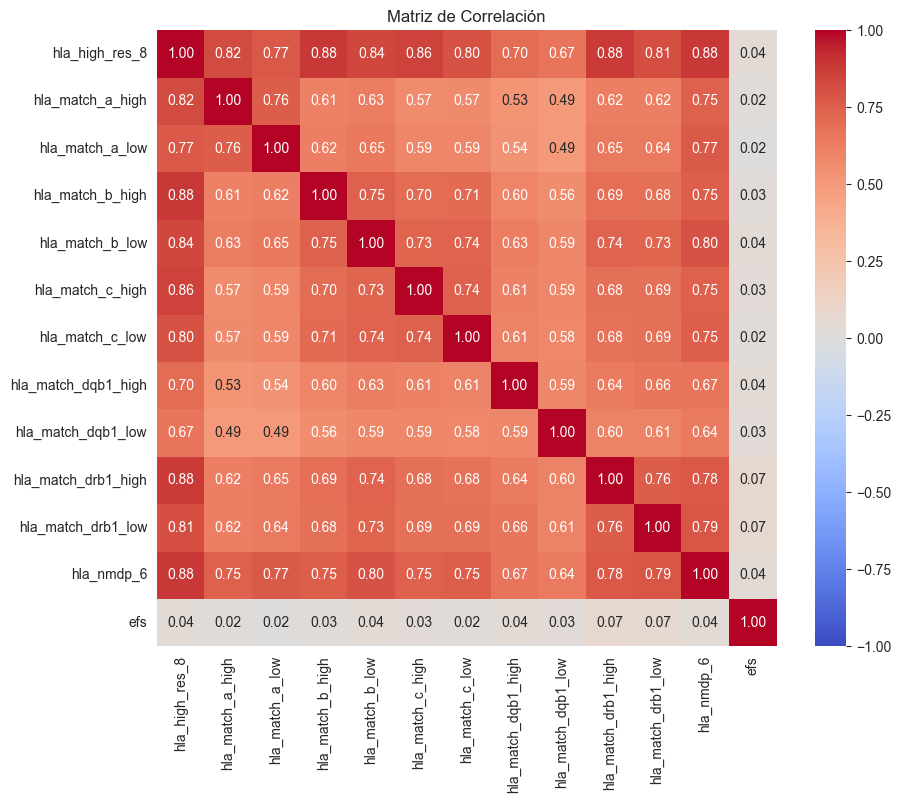

In [12]:
corr_mat = train_df[[
    'hla_high_res_8',
    'hla_match_a_high', 'hla_match_a_low',
    'hla_match_b_high', 'hla_match_b_low',
    'hla_match_c_high', 'hla_match_c_low',
    'hla_match_dqb1_high', 'hla_match_dqb1_low',
    'hla_match_drb1_high', 'hla_match_drb1_low',
    'hla_nmdp_6',
    'efs',
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

# Preprocess Data

In [13]:
train_df.reset_index(drop=True, inplace=True)

numeric_cols.remove('efs')
numeric_cols.remove('efs_time')
numeric_cols.remove('ID')

X = train_df[numeric_cols].copy()

y = train_df['efs'].copy()

In [14]:
race_group_categorical = pd.get_dummies(train_df['race_group'], dtype=int, prefix='race_group')
X = pd.concat([X, race_group_categorical], axis=1)

In [15]:
X.shape

(28800, 23)

# Save Data

In [16]:
X.to_pickle(DATA_PATH + f'train_test_split/X_{DATE_TODAY.day}-{DATE_TODAY.month}-{DATE_TODAY.year}.pkl')
y.to_pickle(DATA_PATH + f'train_test_split/y_{DATE_TODAY.day}-{DATE_TODAY.month}-{DATE_TODAY.year}.pkl')

train_df['efs_time'].to_pickle(DATA_PATH + f'train_test_split/efs_time_{DATE_TODAY.day}-{DATE_TODAY.month}-{DATE_TODAY.year}.pkl')
train_df['race_group'].to_pickle(DATA_PATH + f'train_test_split/race_group_{DATE_TODAY.day}-{DATE_TODAY.month}-{DATE_TODAY.year}.pkl')